In [1]:
##########3 Training the Model for Rock paper Scissors #################3


In [1]:
import pydot
import cv2
import numpy as np
# import squeezenet
# from squeezenet import SqueezeNet
# from keras_squeezenet import Squeeznet
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
# from keras_applications.imagenet_utils import _obtain_input_shape
# from keras_squeezenet import SqueezeNet
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
X = pickle.load(open("X.pickle", "rb"))
Y = pickle.load(open("Y.pickle", "rb"))

In [3]:
print(len(Y))

1595


In [4]:
X = np.array(X/255.0)
Y = np.array(Y)

In [5]:
IMG_SAVE_PATH = 'image_data'

CLASS_MAP = {
    "face_mask": 0,
    "no_face": 1,
    "no_mask": 3,
}

NUM_CLASSES = len(CLASS_MAP)


def mapper(val):
    return CLASS_MAP[val]

In [6]:
model = tf.keras.models.Sequential()

# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=(300,300,3),
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Fourth convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten the results to feed into dense layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

# Output layer.
model.add(tf.keras.layers.Dense(
    units=NUM_CLASSES,
    activation=tf.keras.activations.softmax
))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       1

In [9]:
# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [11]:
model.fit(X,Y, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
28/40 [====================>.........] - ETA: 3:36 - loss: 0.0478 - accuracy: 0.9855

KeyboardInterrupt: 

In [12]:
train_loss, train_accuracy = model.evaluate(X,Y)

50/50 [==============================] - 234s 5s/step - loss: 0.0020 - accuracy: 1.0000


In [13]:
index = 153
# print(X[0].shape)
print(Y[index])
# img_array = img_array/255.0
new_array = np.expand_dims(X[index],axis = 0)
print(new_array.shape)
np.argmax(model.predict(new_array))
# model.predict()

2
(1, 300, 300, 3)


2

In [17]:
img_array = cv2.imread("test.png")
print(img_array.shape)
img_array = img_array/255.0
img_array = np.expand_dims(img_array, axis = 0)
np.argmax(model.predict(img_array))

(300, 300, 3)


0

In [14]:
model_name = 'face_mask_detection.h5'
model.save(model_name, save_format='h5')


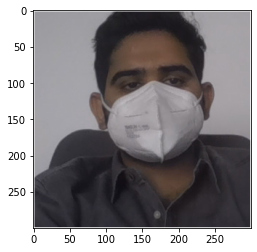

(1, 300, 300, 3)


In [16]:
from keras.preprocessing import image
img_path = 'test.png'
img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)
